In [572]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [573]:
df = pd.read_csv('dataset.csv')
df.drop('sID', axis=1, inplace=True)
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [574]:
df.tail()

,Datetime,Count
11851,31-12-2013 19:00,286
11852,31-12-2013 20:00,256
11853,31-12-2013 21:00,228
11854,31-12-2013 22:00,216
11855,31-12-2013 23:00,246


In [575]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 

In [576]:
df = df.resample('D').mean() 
df.tail()

,Count
Datetime,
2013-12-27,161.166667
2013-12-28,128.500000
2013-12-29,97.083333
2013-12-30,205.333333
2013-12-31,202.500000


# <strong> Is dataset Stationary or Non-stationary? </strong>

### There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

### 1. <ins> Look at Plots: </ins> You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
### 2. <ins> Summary Statistics: </ins> You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
### 3. <ins> Statistical Tests: </ins> You can use statistical tests to check if the expectations of stationarity are met or have been violated.

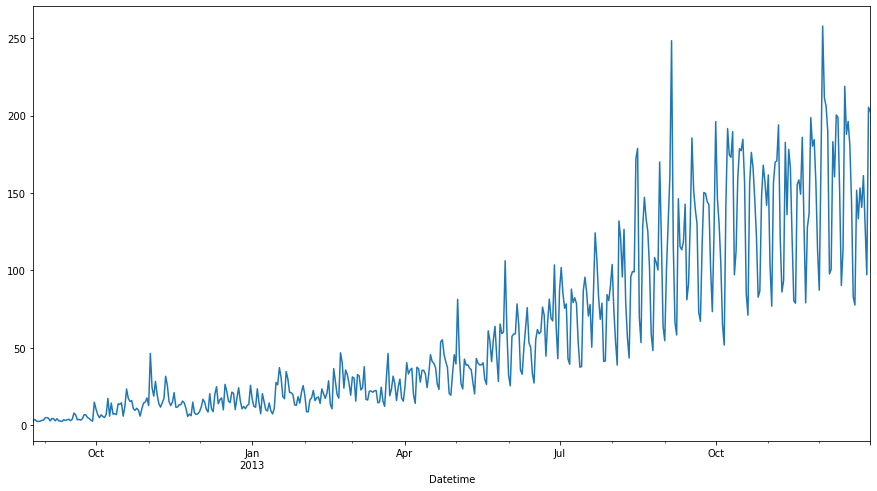

In [577]:
plt.figure(figsize=(15,8))
df['Count'].plot()
plt.show()

In [578]:
values = df.values
split = round(len(values) / 2)
values_1, values_2 = values[0:split], values[split:]
mean1, mean2 = values_1.mean(), values_2.mean()
var1, var2 = values_1.var(), values_2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17.541498, mean2=104.067814
variance1=122.633315, variance2=2725.933407


### Running the example above, we can see the mean and variance look very different.

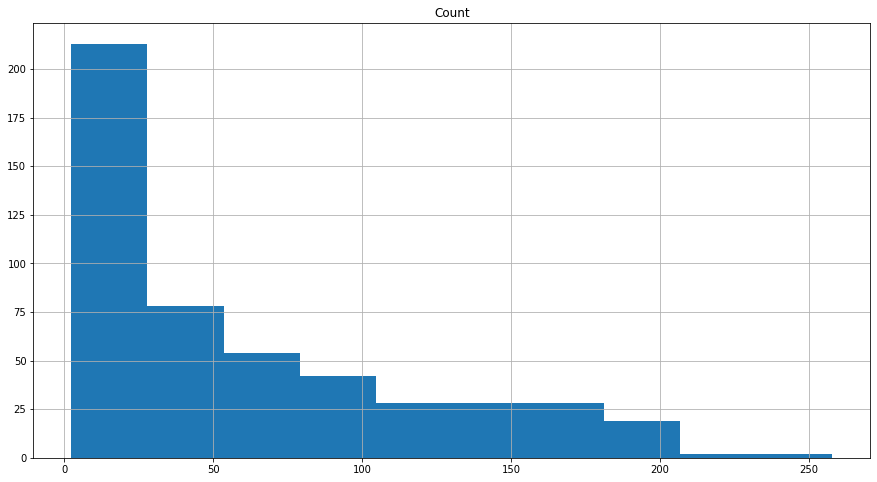

In [579]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

### This squashed distribution of the observations may be another indicator of a non-stationary time series.

In [580]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller (ADF)

### The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

### - Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

### - Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

### - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
### - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [581]:
result = adfuller(df.values, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

ADF Statistic: 0.165688
p-value: 0.970270
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Result: The series is not stationary


# Kwiatkowski–Phillips–Schmidt–Shin (KPSS)
### These tests are used for testing a NULL Hypothesis (HO), that will perceive the time-series, as stationary around a deterministic trend against the alternative of a unit root. Since TSA looking for Stationary Data for its further analysis, we have to make sure that the dataset should be stationary.

In [582]:
result = kpss(df.values, regression='ct')
print('nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] < 0.05 else ""}stationary')


nKPSS Statistic: 0.602928
p-value: 0.010000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
Result: The series is not stationary


## From the methods in order to check if the data is Stationary or not, it can be concluded as the dataset is Non-Stationary. Therefore, the dataset must be turn Non-Stationary to Stationary.

# Sperate dataset into training and test set

In [583]:
train=df[0:-29] 
test=df[-30:]
train_values = train.values
test_values = test.values

In [584]:
df.shape, train.shape, test.shape

((494, 1), (465, 1), (30, 1))

In [585]:
from statsmodels.graphics.tsaplots import plot_acf

# Auto-Correlation Function (ACF)

### ACF is used to indicate and how similar a value is within a given time series and the previous value. (OR) It measures the degree of the similarity between a given time series and the lagged version of that time series at different intervals that we observed.
### Python Statsmodels library calculates autocorrelation. This is used to identify a set of trends in the given dataset and the influence of former observed values on the currently observed values.

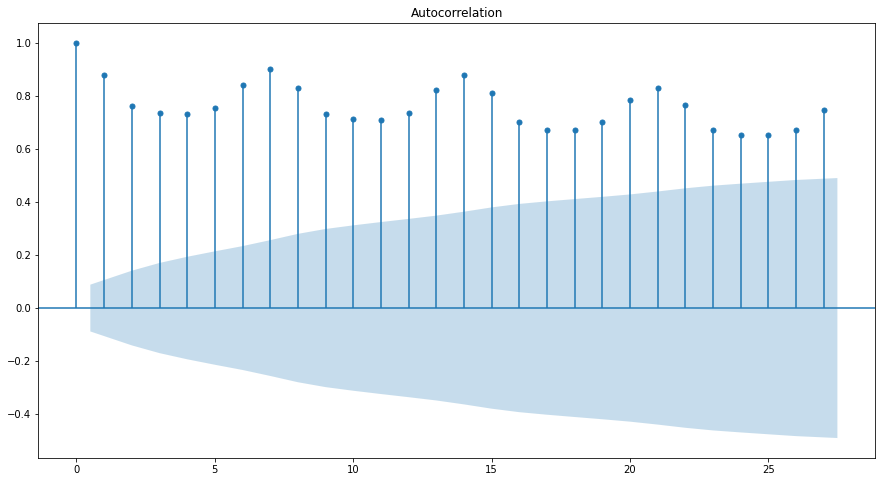

In [586]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plot_acf(df.values, ax=ax)
plt.show()

# Partial Auto-Correlation (PACF)

### PACF is similar to Auto-Correlation Function and is a little challenging to understand. It always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series.

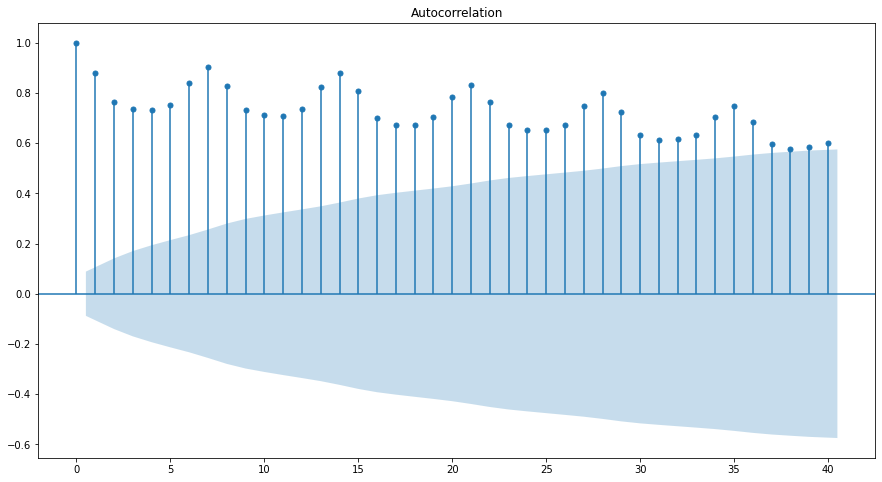

In [587]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plot_acf(df.values, lags=40, ax= ax)
plt.show()

## Check, given dataset is random or not



In [588]:
from pandas.plotting import lag_plot

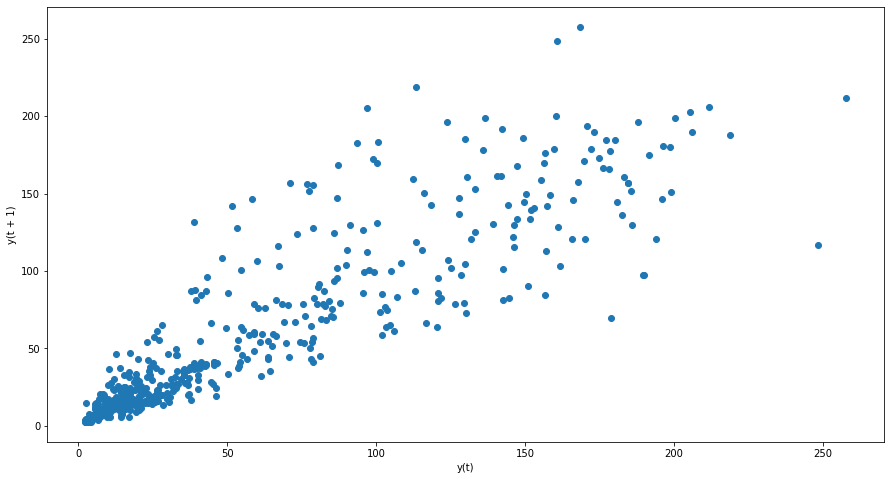

In [589]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
lag_plot(df, ax=ax)
plt.show()

## From the plotting above, dataset looks random and scattered.

# Import metrics

In [590]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [591]:
def calculate_metrics_and_print_results(test, prediction):
    mae = mean_absolute_error(test, prediction)
    print('Mean Absolute Error: %.3f' % mae)

    mape = mean_absolute_percentage_error(test, prediction)
    print('Mean Absolute Percentage Error %.3f' % mape)

    mse = mean_squared_error(test, prediction)
    print('Mean Squared Error %.3f' % mse)

    rmse = sqrt(mean_squared_error(test, prediction))
    print('Root Mean Squared Error:%.3f' % rmse)

# 1. Autoregression (AR)

In [592]:
from statsmodels.tsa.ar_model import AutoReg

In [593]:
model = AutoReg(train_values, lags=20)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# Predictions
predictions = model_fit.predict(start=len(train_values) -1, end=len(train_values)+len(test_values)-2, dynamic=False)

Coefficients: [ 1.46619696  0.39201375 -0.0469019   0.05726394  0.08891973 -0.09919315
  0.11147919  0.25091809 -0.0290656  -0.15023447  0.16003572 -0.05255796
 -0.07552477  0.11512851  0.23971168  0.09723631 -0.10328873 -0.04910241
 -0.08248973  0.0730324   0.11928596]


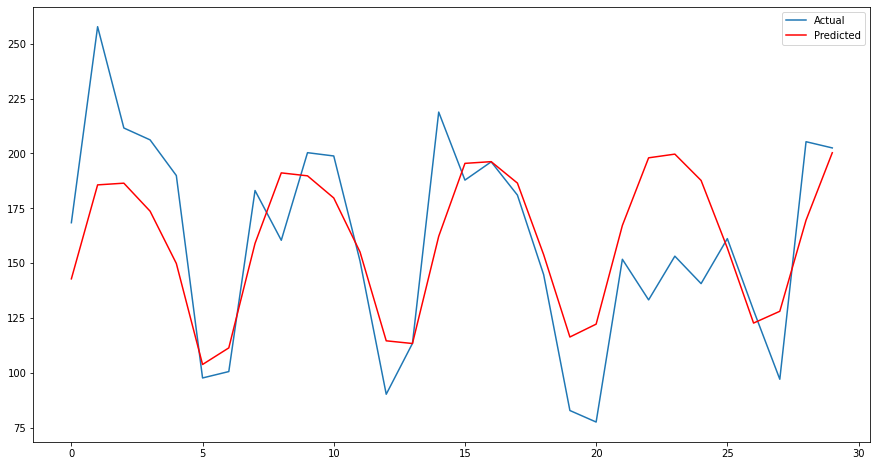

In [594]:
plt.figure(figsize=(15,8))
plt.plot(test_values, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [595]:
calculate_metrics_and_print_results(test_values, predictions)

Mean Absolute Error: 24.501
Mean Absolute Percentage Error 0.168
Mean Squared Error 983.235
Root Mean Squared Error:31.357


# 2. Moving Average (MA)

In [596]:
prediction_moving_avg = test.copy()
prediction_moving_avg['Count'] = train['Count'].rolling(30, min_periods=1).mean().iloc[-1]


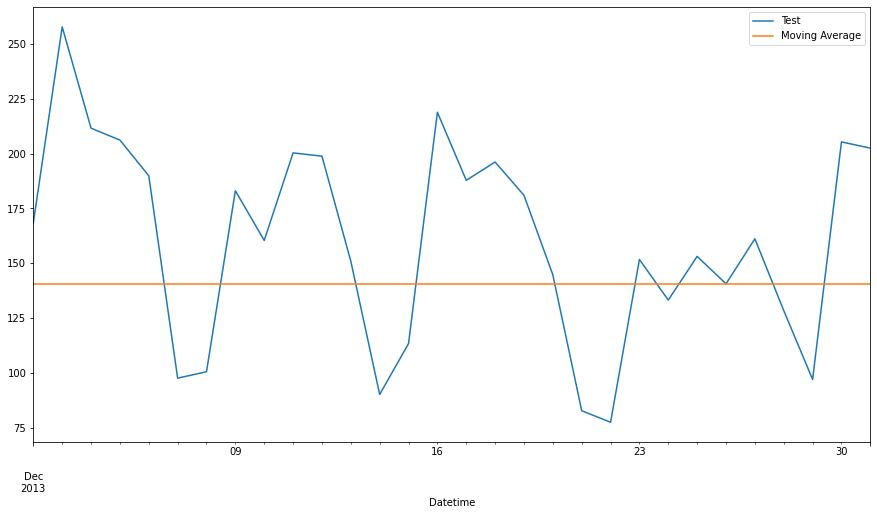

In [597]:
plt.figure(figsize=(15,8))
test['Count'].plot(label='Test')
prediction_moving_avg['Count'].plot(label='Moving Average')
plt.legend(loc='best')
plt.show()

In [598]:
calculate_metrics_and_print_results(test.values, prediction_moving_avg.values)

Mean Absolute Error: 42.040
Mean Absolute Percentage Error 0.278
Mean Squared Error 2445.262
Root Mean Squared Error:49.450


# 3. Autoregressive Moving Average (ARMA)

In [599]:
from statsmodels.tsa.arima_model import ARMA


In [600]:
arma_model = ARMA(train_values, order=(3,1))
arma_model_fit = arma_model.fit(disp=0)

In [601]:
print(arma_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  465
Model:                     ARMA(3, 1)   Log Likelihood               -2055.852
Method:                       css-mle   S.D. of innovations             20.037
Date:                Thu, 16 Dec 2021   AIC                           4123.703
Time:                        11:08:23   BIC                           4148.556
Sample:                             0   HQIC                          4133.485
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3744     63.843      1.134      0.257     -52.755     197.503
ar.L1.y        1.5394      0.024     65.002      0.000       1.493       1.586
ar.L2.y       -0.9536      0.040    -23.998      0.0

In [602]:
arma_predictions = arma_model_fit.predict(start=len(train_values) -1, end=len(train_values)+len(test_values)-2, dynamic=False)
arma_predictions

array([122.85582788, 181.66083796, 155.14840608, 135.31814849,
       135.5515684 , 143.85236735, 148.20451374, 147.08546636,
       144.64670878, 143.75998995, 144.25753875, 144.86012106,
       144.9464692 , 144.71062458, 144.51450732, 144.47321677,
       144.49909709, 144.49717846, 144.45246459, 144.39616736,
       144.35134647, 144.3175338 , 144.28493197, 144.24844469,
       144.20937552, 144.17053772, 144.13291067, 144.09585879,
       144.05863346, 144.02109358])

In [603]:
# fig = plt.figure(figsize=(15,8))
# ax = fig.gca()
# arma_model_fit.plot_predict( ax=ax)
# plt.show()

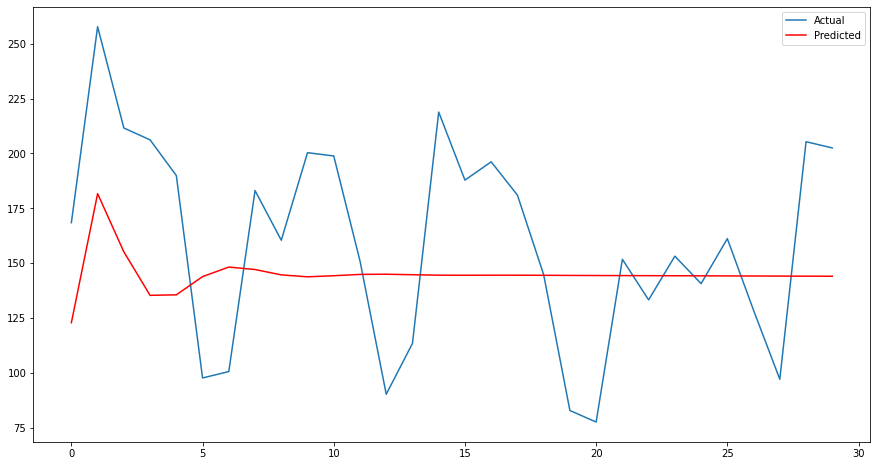

In [604]:
plt.figure(figsize=(15,8))
plt.plot(test_values, label='Actual')
plt.plot(arma_predictions, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [605]:
calculate_metrics_and_print_results(test_values, predictions)

Mean Absolute Error: 24.501
Mean Absolute Percentage Error 0.168
Mean Squared Error 983.235
Root Mean Squared Error:31.357


# Turn Non-Stationary data into Stationary data by using <strong> Differencing </strong>

## Find d = differencing value by using adf and kpss test

In [606]:
from pmdarima.arima.utils import ndiffs

In [607]:
print(ndiffs(df.values, test='adf'))
print(ndiffs(df.values, test='kpss'))

1
1


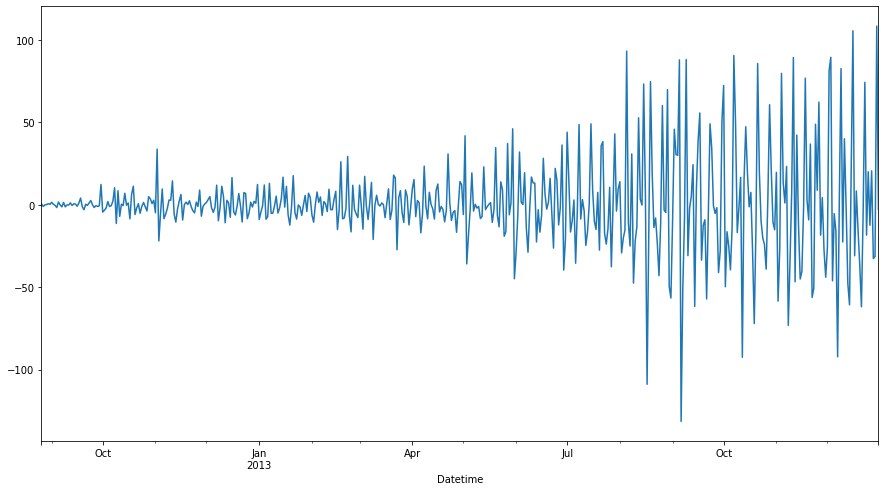

In [608]:
df_diff = df.diff().dropna()
plt.figure(figsize=(15,8))
df_diff['Count'].plot()
plt.show()

# Test if the data is stationary

In [609]:
result = adfuller(df_diff.values, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] > 0.05 else ""}stationary')

ADF Statistic: -7.262615
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
Result: The series is stationary


In [610]:
result = kpss(df_diff.values, regression='ct')
print('nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))
print(f'Result: The series is {"not " if result[1] < 0.05 else ""}stationary')

nKPSS Statistic: 0.018105
p-value: 0.100000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
Result: The series is stationary


# Plot ACF and PACF

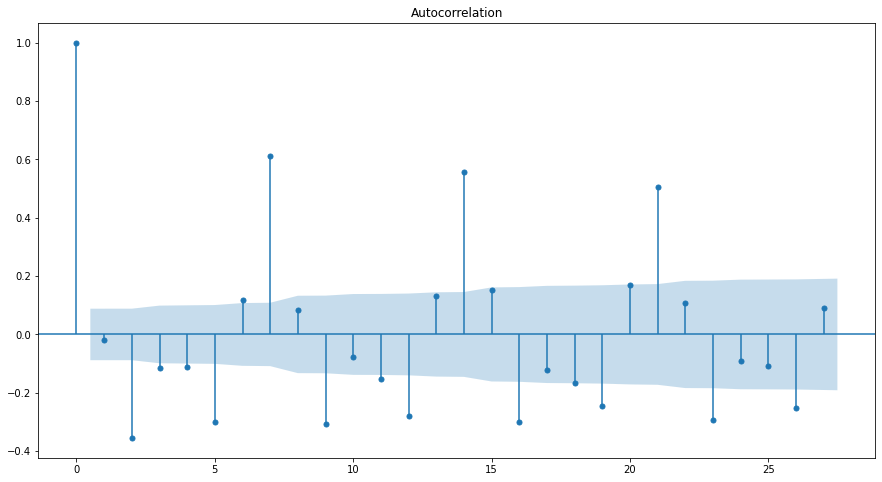

In [611]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plot_acf(df_diff.values, ax=ax)
plt.show()

In [612]:
order = (3, 0, 3)
s_order = (3, 0, 2, 7)

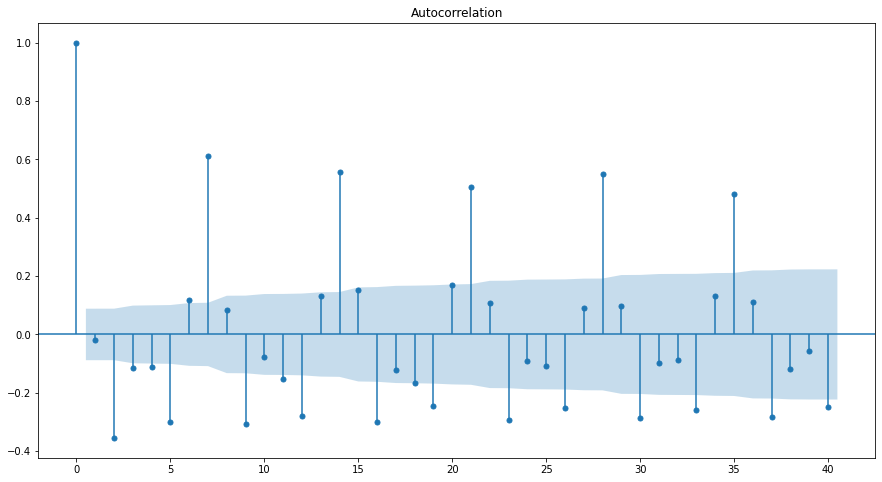

In [613]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plot_acf(df_diff.values, lags=40, ax= ax)
plt.show()

In [614]:
train_diff=df_diff[0:-29] 
test_diff=df_diff[-30:]
train_diff_values = train_diff.values
test_diff_values = test_diff.values

# 4. Autoregressive Integrated Moving Average (ARIMA)

In [615]:
from statsmodels.tsa.arima.model import ARIMA

In [616]:
arima_model_fit = ARIMA(train_values, order=(5,1,5), seasonal_order=(3, 0, 2, 7)).fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  465
Model:             ARIMA(5, 1, 5)x(3, 0, [1, 2], 7)   Log Likelihood               -1901.880
Date:                              Thu, 16 Dec 2021   AIC                           3835.759
Time:                                      11:08:29   BIC                           3901.997
Sample:                                           0   HQIC                          3861.833
                                              - 465                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9044      0.055     16.535      0.000       0.797       1.012
ar.L2         -1.0258      0.062    -16.478      0.000      -1.148      -0.904
ar.L3          0.8388      0.081     10.409      0.000       0.681       0.997
ar.L4         -1.0982      0.058    -18.943      0.000      -1.212      -0.985
ar.L5          0.3026      0.048      6.324      0.000       0.209       0.396
ma.L1         -1.5309      0.046    -33.153      0.000      -1.621      -1.440
ma.L2          1.2982      0.075     17.333      0.000       1.151       1.445
ma.L3         -1.2595      0.081    -15.560      0.000      -1.418      -1.101
ma.L4          1.4231      0.072     19.837      0.000       1.283       1.564
ma.L5         -0.8706      0.046    -18.868      0.000      -0.961      -0.780
ar.S.L7        0.2127      0.475      0.448      0.654      -0.719       1.144
ar.S.L14       0.7664      0.413      1.858      0.063      -0.042       1.575
ar.S.L21       0.0047      0.074      0.064      0.949      -0.139       0.149
ma.S.L7       -0.0695      0.469     -0.148      0.882      -0.988       0.849
ma.S.L14      -0.6013      0.359     -1.674      0.094      -1.305       0.103
sigma2       209.5722      8.053     26.025      0.000     193.789     225.355
===================================================================================
Ljung-Box (Q):                       48.36   Jarque-Bera (JB):              1034.74
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              16.00   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [617]:
arima_predictions = arima_model_fit.predict(start=len(train_diff_values) -1, end=len(train_diff_values)+len(test_diff_values)-2, dynamic=False)

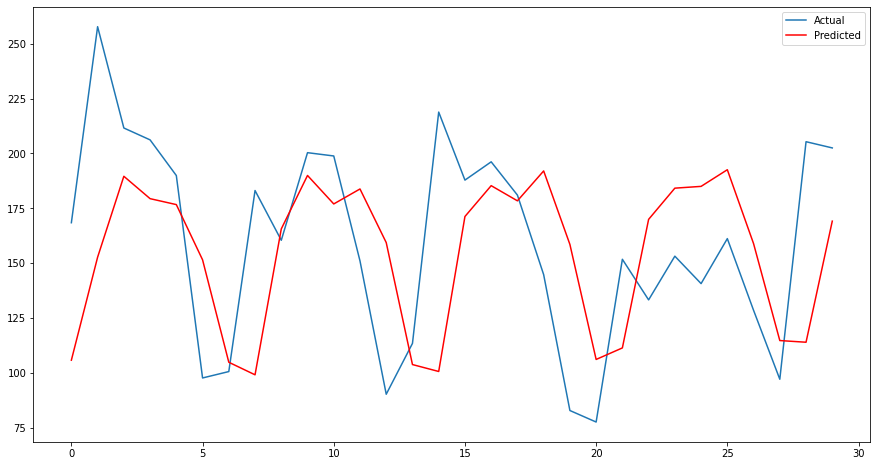

In [618]:
plt.figure(figsize=(15,8))
plt.plot(test_values, label='Actual')
plt.plot(arima_predictions, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [619]:
calculate_metrics_and_print_results(test_diff_values, arima_predictions)

Mean Absolute Error: 150.838
Mean Absolute Percentage Error 13.963
Mean Squared Error 28099.273
Root Mean Squared Error:167.628


# Bonus - Auto Arima

In [620]:
from pmdarima import auto_arima

In [621]:
auto_arima_model = auto_arima(train_values, start_p=3, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=4093.860, BIC=4118.700, Time=0.313 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4318.202, BIC=4326.481, Time=0.049 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4319.950, BIC=4332.370, Time=0.018 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4252.270, BIC=4264.690, Time=0.026 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4316.294, BIC=4320.434, Time=0.004 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=4097.070, BIC=4117.769, Time=0.069 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=4244.563, BIC=4265.262, Time=0.051 seconds
Fit ARIMA(4,1,1)x(0,0,0,0) [intercept=True]; AIC=4050.695, BIC=4079.675, Time=0.118 seconds
Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=4211.717, BIC=4236.556, Time=0.070 seconds
Fit ARIMA(5,1,1)x(0,0,0,0) [intercept=True]; AIC=3957.261, BIC=3990.380, Time=0.194 seconds
Fit ARIMA(5,1,0)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  465
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -1949.743
Date:                Thu, 16 Dec 2021   AIC                           3919.486
Time:                        11:08:31   BIC                           3960.884
Sample:                             0   HQIC                          3935.782
                                - 465                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8716      0.296      2.948      0.003       0.292       1.451
ar.L1          0.0812      0.038      2.154      0.031       0.007       0.155
ar.L2         -0.8860      0.038    -23.578      0.000      -0.960      -0.812
ar.L3         -0.0509      0.051     -0.992      0.321      -0.152       0.050
ar.L4         -0.3583      0.034    -10.691      0.000      -0.424      -0.293
ar.L5         -0.4761      0.040    -11.927      0.000      -0.554      -0.398
ma.L1         -0.5432      0.038    -14.344      0.000      -0.617      -0.469
ma.L2          0.5099      0.042     12.008      0.000       0.427       0.593
ma.L3         -0.6410      0.037    -17.283      0.000      -0.714      -0.568
sigma2       260.3472     11.302     23.035      0.000     238.195     282.500
===================================================================================
Ljung-Box (Q):                      101.56   Jarque-Bera (JB):               444.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              15.38   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

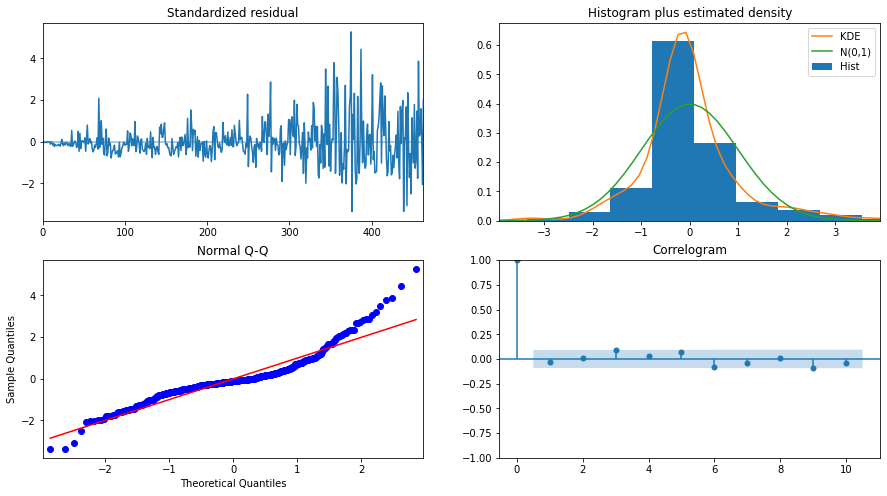

In [622]:
auto_arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

In [623]:
auto_arima_predictions = auto_arima_model.predict(n_periods=len(test_diff_values), return_conf_int=False)

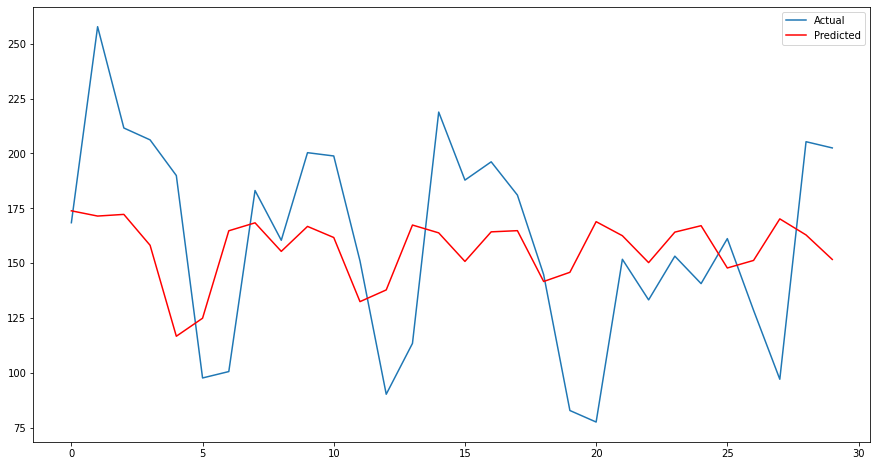

In [624]:
plt.figure(figsize=(15,8))
plt.plot(test_values, label='Actual')
plt.plot(auto_arima_predictions, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [625]:
calculate_metrics_and_print_results(test_values, auto_arima_predictions)

Mean Absolute Error: 37.319
Mean Absolute Percentage Error 0.276
Mean Squared Error 1982.243
Root Mean Squared Error:44.522
